### 연관분석(association rule)
* 데이터 집합으로부터 특정 규칙들을 찾아내는 분석 방법
* 장바구니 분석

#### 구매내역 예)
1. 기저귀, 맥주, 속옷, 휴지
2. 맥주, 땅콩, 오징어
3. 기저귀, 티셔츠, 수건
4. 맥주, 오징어, 휴지
5. 기저귀, 맥주
6. 휴지, 기저귀
7. 속옷, 기저귀, 맥주
8. 휴지, 속옷
9. 수건, 휴지
10. 수건,기저귀,맥주
#### 연관분석 평가 지표
#### 기저귀(A), 맥주(B)
* 지지도(support) supoort A = P(A) : 기저귀가 전체10회 내역 중 6번 6/10 = 0.6
    * support A->B = P(A∩B) = A와B를 동시에 구매한 수 / 전체횟수 = 4/10
* 신뢰도 (confidence) : A의 거래 중 B가 포함된 거래의 비율 = 0.4/0.6
    * confidence A->B = P(A∩B) / P(A)
* 향상도 (lift)
    * lift A->B = P(B|A)/P(B) = P(A∩B)/P(A) * P(B) = 신뢰도/P(B) = 0.66/0.5
        * = 1.32
        * 1보다 크면 양의 상관관계(관계가 높음)

### 데이터 불러오기

In [1]:
import pymysql
# MySQL Connection 연결
conn = pymysql.connect(host='localhost', user='root', password='ai1234', db='crawling', charset='utf8')
# Connection 으로부터 Cursor 생성
cur = conn.cursor()
cur.execute('select * from corona')
data = cur.fetchall()
cur.close()
conn.close()

In [5]:
content = [row[1] for row in data]

In [6]:
len(content)

818

In [7]:
content2 = []
for row in data:
    content2.append(row[1])
len(content2)

818

In [10]:
# 모듈화했던 함수와는 다름
# 이 함수는 문장이 여러개 있는 데이터가 매개변수로 오는 경우
def preprocessing(txt):
    from tqdm import tqdm_notebook
    import re
    for i,t in enumerate(txt):
        txt[i] = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', txt[i])
    sw = set() # 집합자료형 선언
    with open('stopwords-ko.txt', encoding='utf-8') as f:
        for w in f:
            sw.add(w.replace('\n',''))
    corpus = []
    from eunjeon import Mecab
    mecab = Mecab()
    for n in tqdm_notebook(range(len(txt))):
        doc = []
        for word in mecab.morphs(txt[n]):
            if word not in sw and len(word) > 1:
                doc.append(word)
        corpus.append(doc)
    return corpus

In [11]:
naver_content = preprocessing(content)
naver_content[0]

<ipython-input-10-bc08ca79f09c>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(range(len(txt))):


['중앙',
 '방역',
 '대책',
 '본부',
 '기준',
 '지역',
 '발생',
 '국외',
 '유입',
 '명일',
 '서울역',
 '광장',
 '마련',
 '코로나',
 '임시',
 '선별',
 '진료소',
 '의료진',
 '검체',
 '채취',
 '연합뉴스',
 '코로나',
 '신규',
 '확진',
 '발생',
 '신규',
 '확진',
 '사흘',
 '유지',
 '중앙',
 '방역',
 '대책',
 '본부',
 '이날',
 '기준',
 '코로나',
 '국내',
 '발생',
 '신규',
 '확진',
 '국외',
 '유입',
 '사례',
 '명이',
 '라고',
 '밝혔',
 '국내',
 '코로나',
 '누적',
 '확진',
 '이른다',
 '신규',
 '확진',
 '규모',
 '지난',
 '이날',
 '사흘',
 '연속',
 '명대',
 '유지',
 '연휴',
 '기간',
 '검사',
 '건수',
 '감소',
 '영향',
 '보인다',
 '국내',
 '신규',
 '확진',
 '가운데',
 '수도',
 '나왔',
 '서울',
 '경기',
 '수도',
 '부산',
 '충남',
 '경북',
 '대전',
 '전북',
 '전남',
 '광주',
 '울산',
 '경남',
 '발생',
 '국외',
 '유입',
 '확진',
 '가운데',
 '검역',
 '단계',
 '지역',
 '사회',
 '격리',
 '확진',
 '내국인',
 '외국인',
 '격리',
 '코로나',
 '환자',
 '중증',
 '환자',
 '전날',
 '사망자',
 '누적',
 '서혜',
 '기자',
 '더불',
 '행복',
 '세상',
 '만드',
 '언론',
 '한겨레',
 '구독',
 '세요',
 '기사',
 '보궐',
 '선거',
 '기사',
 '한겨레',
 '신문',
 '무단',
 '전재',
 '배포',
 '금지']

In [12]:
len(naver_content)

818

In [13]:
# apyori 라이브러리
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5979 sha256=d024eea1409d029f228d3aca7d650341811194a8f0f10f5f6ca1087ca8d9d1c7
  Stored in directory: c:\users\sundooedu\appdata\local\pip\cache\wheels\1b\02\6c\a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [14]:
from apyori import apriori

In [19]:
# 연관분석
# 지지도 0.5, 신뢰도 0.5, 향상도 1.0, 룰(규칙)의 길이 2
results = list(apriori(naver_content, 
             min_support=0.5, 
             min_confidence=0.5, 
             min_lift=1.0, 
             max_length=2)
    )

In [20]:
# 데이터프레임으로 변환
import pandas as pd
columns = ['word1', 'word2', 'support']
sup_df = pd.DataFrame(columns=columns)

for result in results:
    if len(result.items) == 2:
        items = [w for w in result.items]
        row = [items[0], items[1], result.support]
        s = pd.Series(row, index=columns)
        sup_df = sup_df.append(s, ignore_index=True)

In [21]:
sup_df.head()

,word1,word2,support
0,구독,금지,0.650367
1,구독,기자,0.588020
2,구독,네이버,0.617359
3,구독,무단,0.644254
4,구독,배포,0.644254


In [22]:
# 단어빈도
# 말뭉치(corpus)
corpus = []
for doc in naver_content:
    for w in doc:
        corpus.append(w)

In [23]:
len(corpus)

145282

In [24]:
corpus[:10]

['중앙', '방역', '대책', '본부', '기준', '지역', '발생', '국외', '유입', '명일']

In [26]:
from collections import Counter
cnt = Counter(corpus)
cnt.items()

dict_items([('중앙', 260), ('방역', 499), ('대책', 261), ('본부', 270), ('기준', 310), ('지역', 446), ('발생', 589), ('국외', 13), ('유입', 178), ('명일', 2), ('서울역', 62), ('광장', 56), ('마련', 128), ('코로나', 3349), ('임시', 151), ('선별', 186), ('진료소', 88), ('의료진', 116), ('검체', 43), ('채취', 26), ('연합뉴스', 629), ('신규', 436), ('확진', 1798), ('사흘', 44), ('유지', 140), ('이날', 347), ('국내', 384), ('사례', 235), ('명이', 39), ('라고', 534), ('밝혔', 467), ('누적', 312), ('이른다', 8), ('규모', 175), ('지난', 480), ('연속', 100), ('명대', 182), ('연휴', 340), ('기간', 200), ('검사', 536), ('건수', 197), ('감소', 440), ('영향', 179), ('보인다', 89), ('가운데', 229), ('수도', 407), ('나왔', 150), ('서울', 718), ('경기', 178), ('부산', 221), ('충남', 72), ('경북', 76), ('대전', 137), ('전북', 59), ('전남', 72), ('광주', 103), ('울산', 80), ('경남', 82), ('검역', 38), ('단계', 327), ('사회', 301), ('격리', 301), ('내국인', 17), ('외국인', 50), ('환자', 416), ('중증', 82), ('전날', 176), ('사망자', 292), ('서혜', 2), ('기자', 963), ('더불', 41), ('행복', 23), ('세상', 79), ('만드', 18), ('언론', 174), ('한겨레', 20), ('구독', 624), ('

In [27]:
freq_df = pd.DataFrame(cnt.items(), columns=['word','freq'])

In [29]:
freq_df = freq_df[freq_df['freq']>=200]
freq_df.head()

,word,freq
0,중앙,260
1,방역,499
2,대책,261
3,본부,270
4,기준,310


In [30]:
freq_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 3632
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    119 non-null    object
 1   freq    119 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [31]:
freq_df.tail()

,word,freq
1008,뉴시스,349
1048,전년,339
1056,일본,237
1193,판정,255
3632,여객,237


### 연관 키워드 시각화
* 그래프
* networkx

In [32]:
import networkx as nx

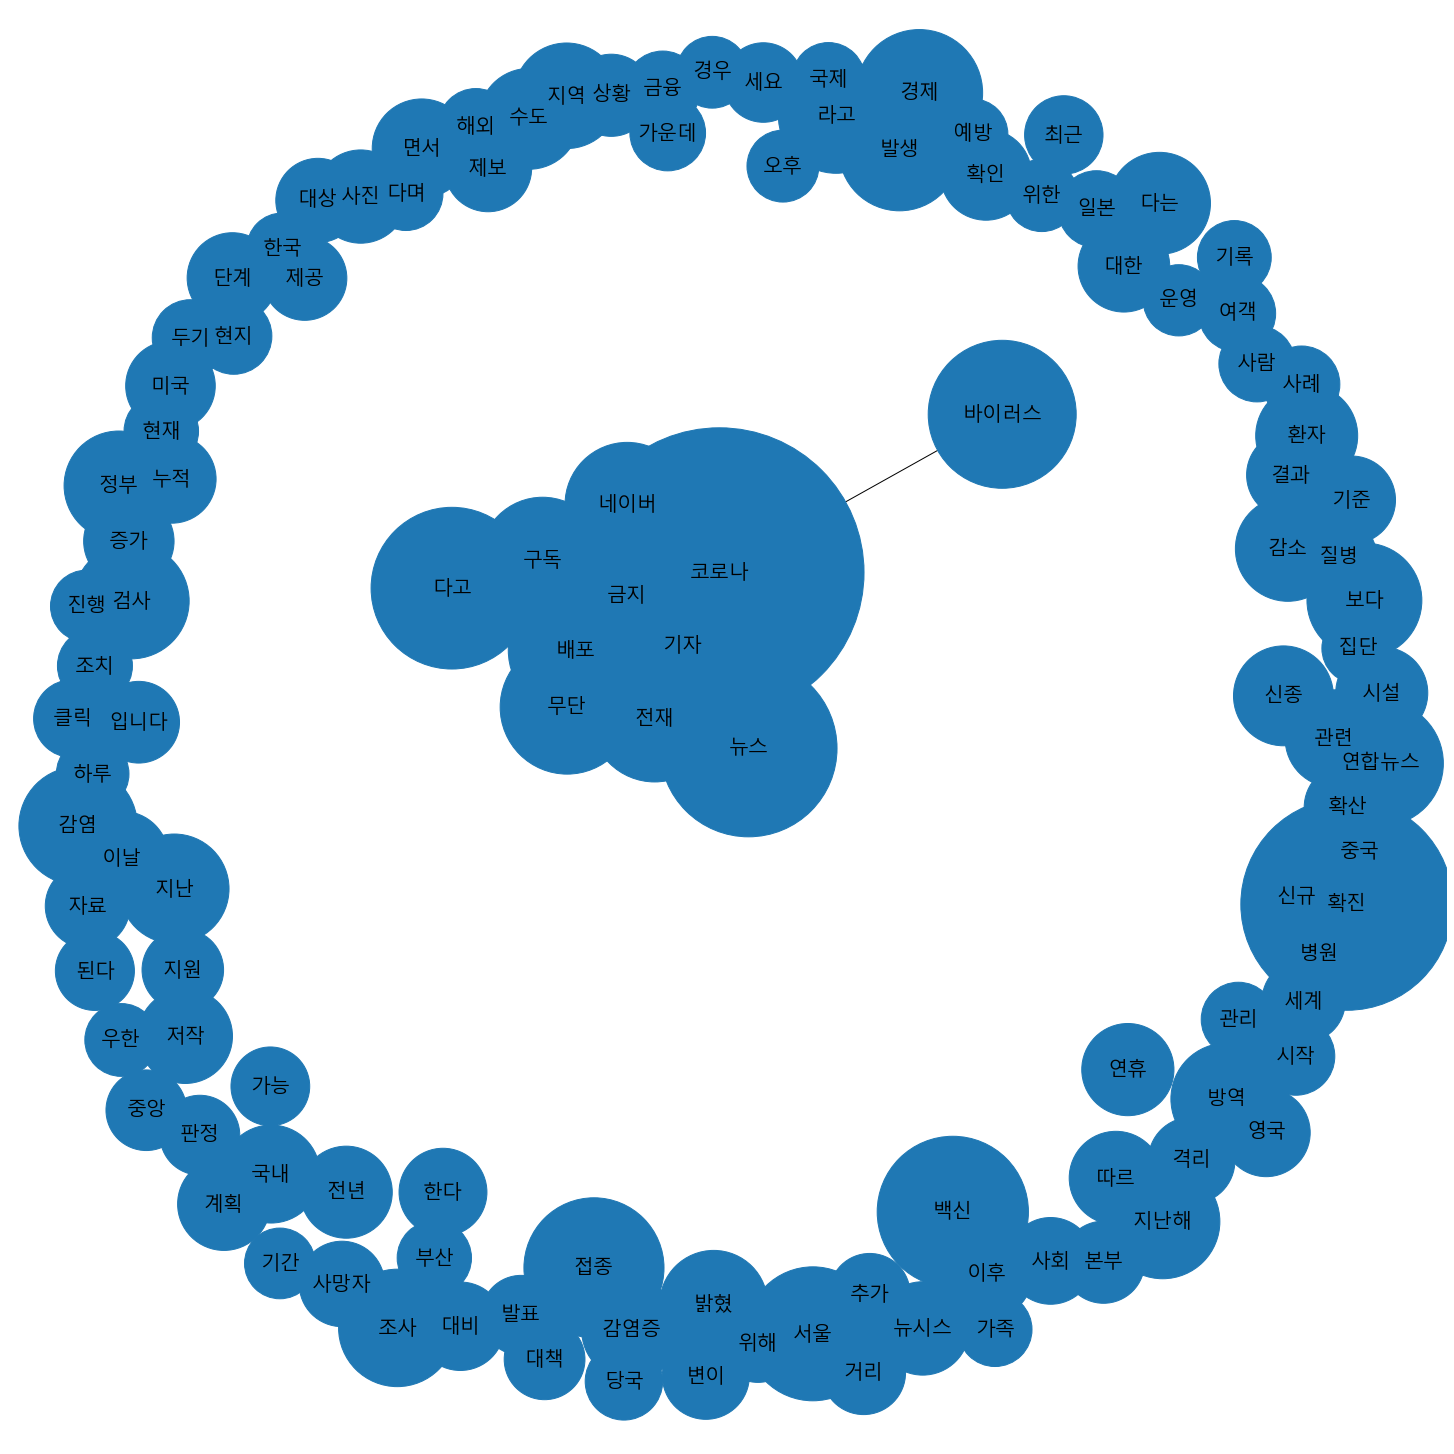

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
# networkx 객체 생성
g = nx.Graph()

# freq_df의 단어 빈도수를 이용해 네트워크 그래프의 원 생성
for idx, row in freq_df.iterrows():
    #print(idx, row['word'], row['freq'])
    g.add_node(row['word'], nodesize=row['freq'])

# sup_df의 연관분석(지지도)를 이용해 노드간의 선 생성
for idx, row in sup_df.iterrows():
    g.add_weighted_edges_from([(row['word1'], row['word2'], row['support'])])
    
# 파라미터
pos = nx.spring_layout(g, k=0.6, iterations=50)
size = [g.nodes[node]['nodesize']*25 for node in g]
nx.draw(g, pos=pos, node_size=size)

# 레이블
nx.draw_networkx_labels(g, pos=pos, font_family='Malgun Gothic', font_size=20)

plt.show()